In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, svm, metrics
%matplotlib inline

In [2]:
missing_values = ["?"]
data = pd.read_csv("C:/Users/Arjun/PycharmProjects/DataScience/Mutiple Regression/export.csv", na_values= missing_values)
data.head()

months_as_customer  age  policy_number     policy_bind_date policy_state  \
0                 328   48         521585  2014-10-17 00:00:00           OH   
1                 228   42         342868  2006-06-27 00:00:00           IN   
2                 134   29         687698  2000-09-06 00:00:00           OH   
3                 256   41         227811  1990-05-25 00:00:00           IL   
4                 228   44         367455  2014-06-06 00:00:00           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                     NaN               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [3]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [4]:
lis = ["property_damage", "police_report_available"]
def mapping(x):
  return x.map({'YES': 1, "NO": 0})

data[lis] = data[lis].apply(mapping)
data.head()

months_as_customer  age  policy_number     policy_bind_date policy_state  \
0                 328   48         521585  2014-10-17 00:00:00           OH   
1                 228   42         342868  2006-06-27 00:00:00           IN   
2                 134   29         687698  2000-09-06 00:00:00           OH   
3                 256   41         227811  1990-05-25 00:00:00           IL   
4                 228   44         367455  2014-06-06 00:00:00           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     1.0              71610   
1       468176  ...         0                     NaN               5070   
2       430632  ...         3                     0.0              34650   
3       608117  ...         2                     0.0              63400   
4       610706  ...         1                     0.0               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [5]:
data["collision_type"] = data["collision_type"].map({"Front Collision": 1.0, "Rear Collision": 2.0, "Side Collision": 3.0})

In [6]:
data = data.fillna({
    "police_report_available" : 0.5,         # An average value due to equal possibility of having a police report
    "property_damage" : 0.5,                 # Equal probability of property damage
    "collision_type" : 0.0                   # 0 due to no collision (Cases of theft corresponds to '?' in dataset)
})
data.head()

months_as_customer  age  policy_number     policy_bind_date policy_state  \
0                 328   48         521585  2014-10-17 00:00:00           OH   
1                 228   42         342868  2006-06-27 00:00:00           IN   
2                 134   29         687698  2000-09-06 00:00:00           OH   
3                 256   41         227811  1990-05-25 00:00:00           IL   
4                 228   44         367455  2014-06-06 00:00:00           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     1.0              71610   
1       468176  ...         0                     0.5               5070   
2       430632  ...         3                     0.0              34650   
3       608117  ...         2                     0.0              63400   
4       610706  ...         1                     0.0               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 39 columns]

Text(0, 0.5, 'Number of people')

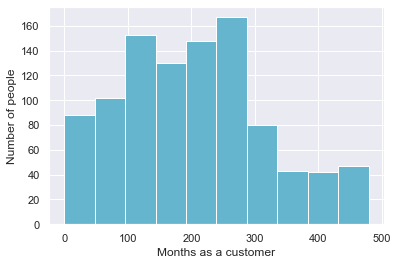

In [7]:
sns.set()
vis1 = plt.hist(data["months_as_customer"], bins=10, 
                color=sns.color_palette()[9])
plt.xlabel("Months as a customer")
plt.ylabel("Number of people")

Text(0, 0.5, 'Annual Premium')

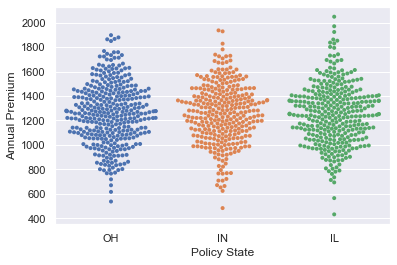

In [8]:
vis2 = sns.swarmplot(x="policy_state", y="policy_annual_premium", data= data, 
                     size= 4)
plt.xlabel("Policy State")
plt.ylabel("Annual Premium")

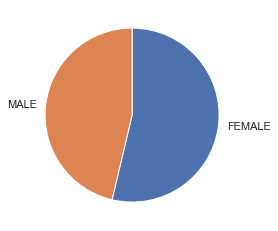

In [9]:
gender = data["insured_sex"].value_counts()
vis3 = plt.pie(gender, labels= gender.index, startangle=90, 
               counterclock=False)

Text(0.5, 1.0, 'Authorities Contacted')

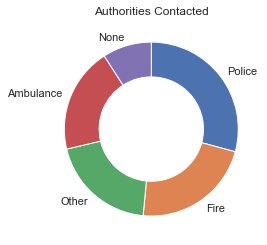

In [10]:
authorities = data["authorities_contacted"].value_counts()
vis4 = plt.pie(authorities, labels=authorities.index, startangle=90, 
               counterclock=False, wedgeprops={'width': 0.4})
plt.title("Authorities Contacted")

C:\Users\Arjun\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


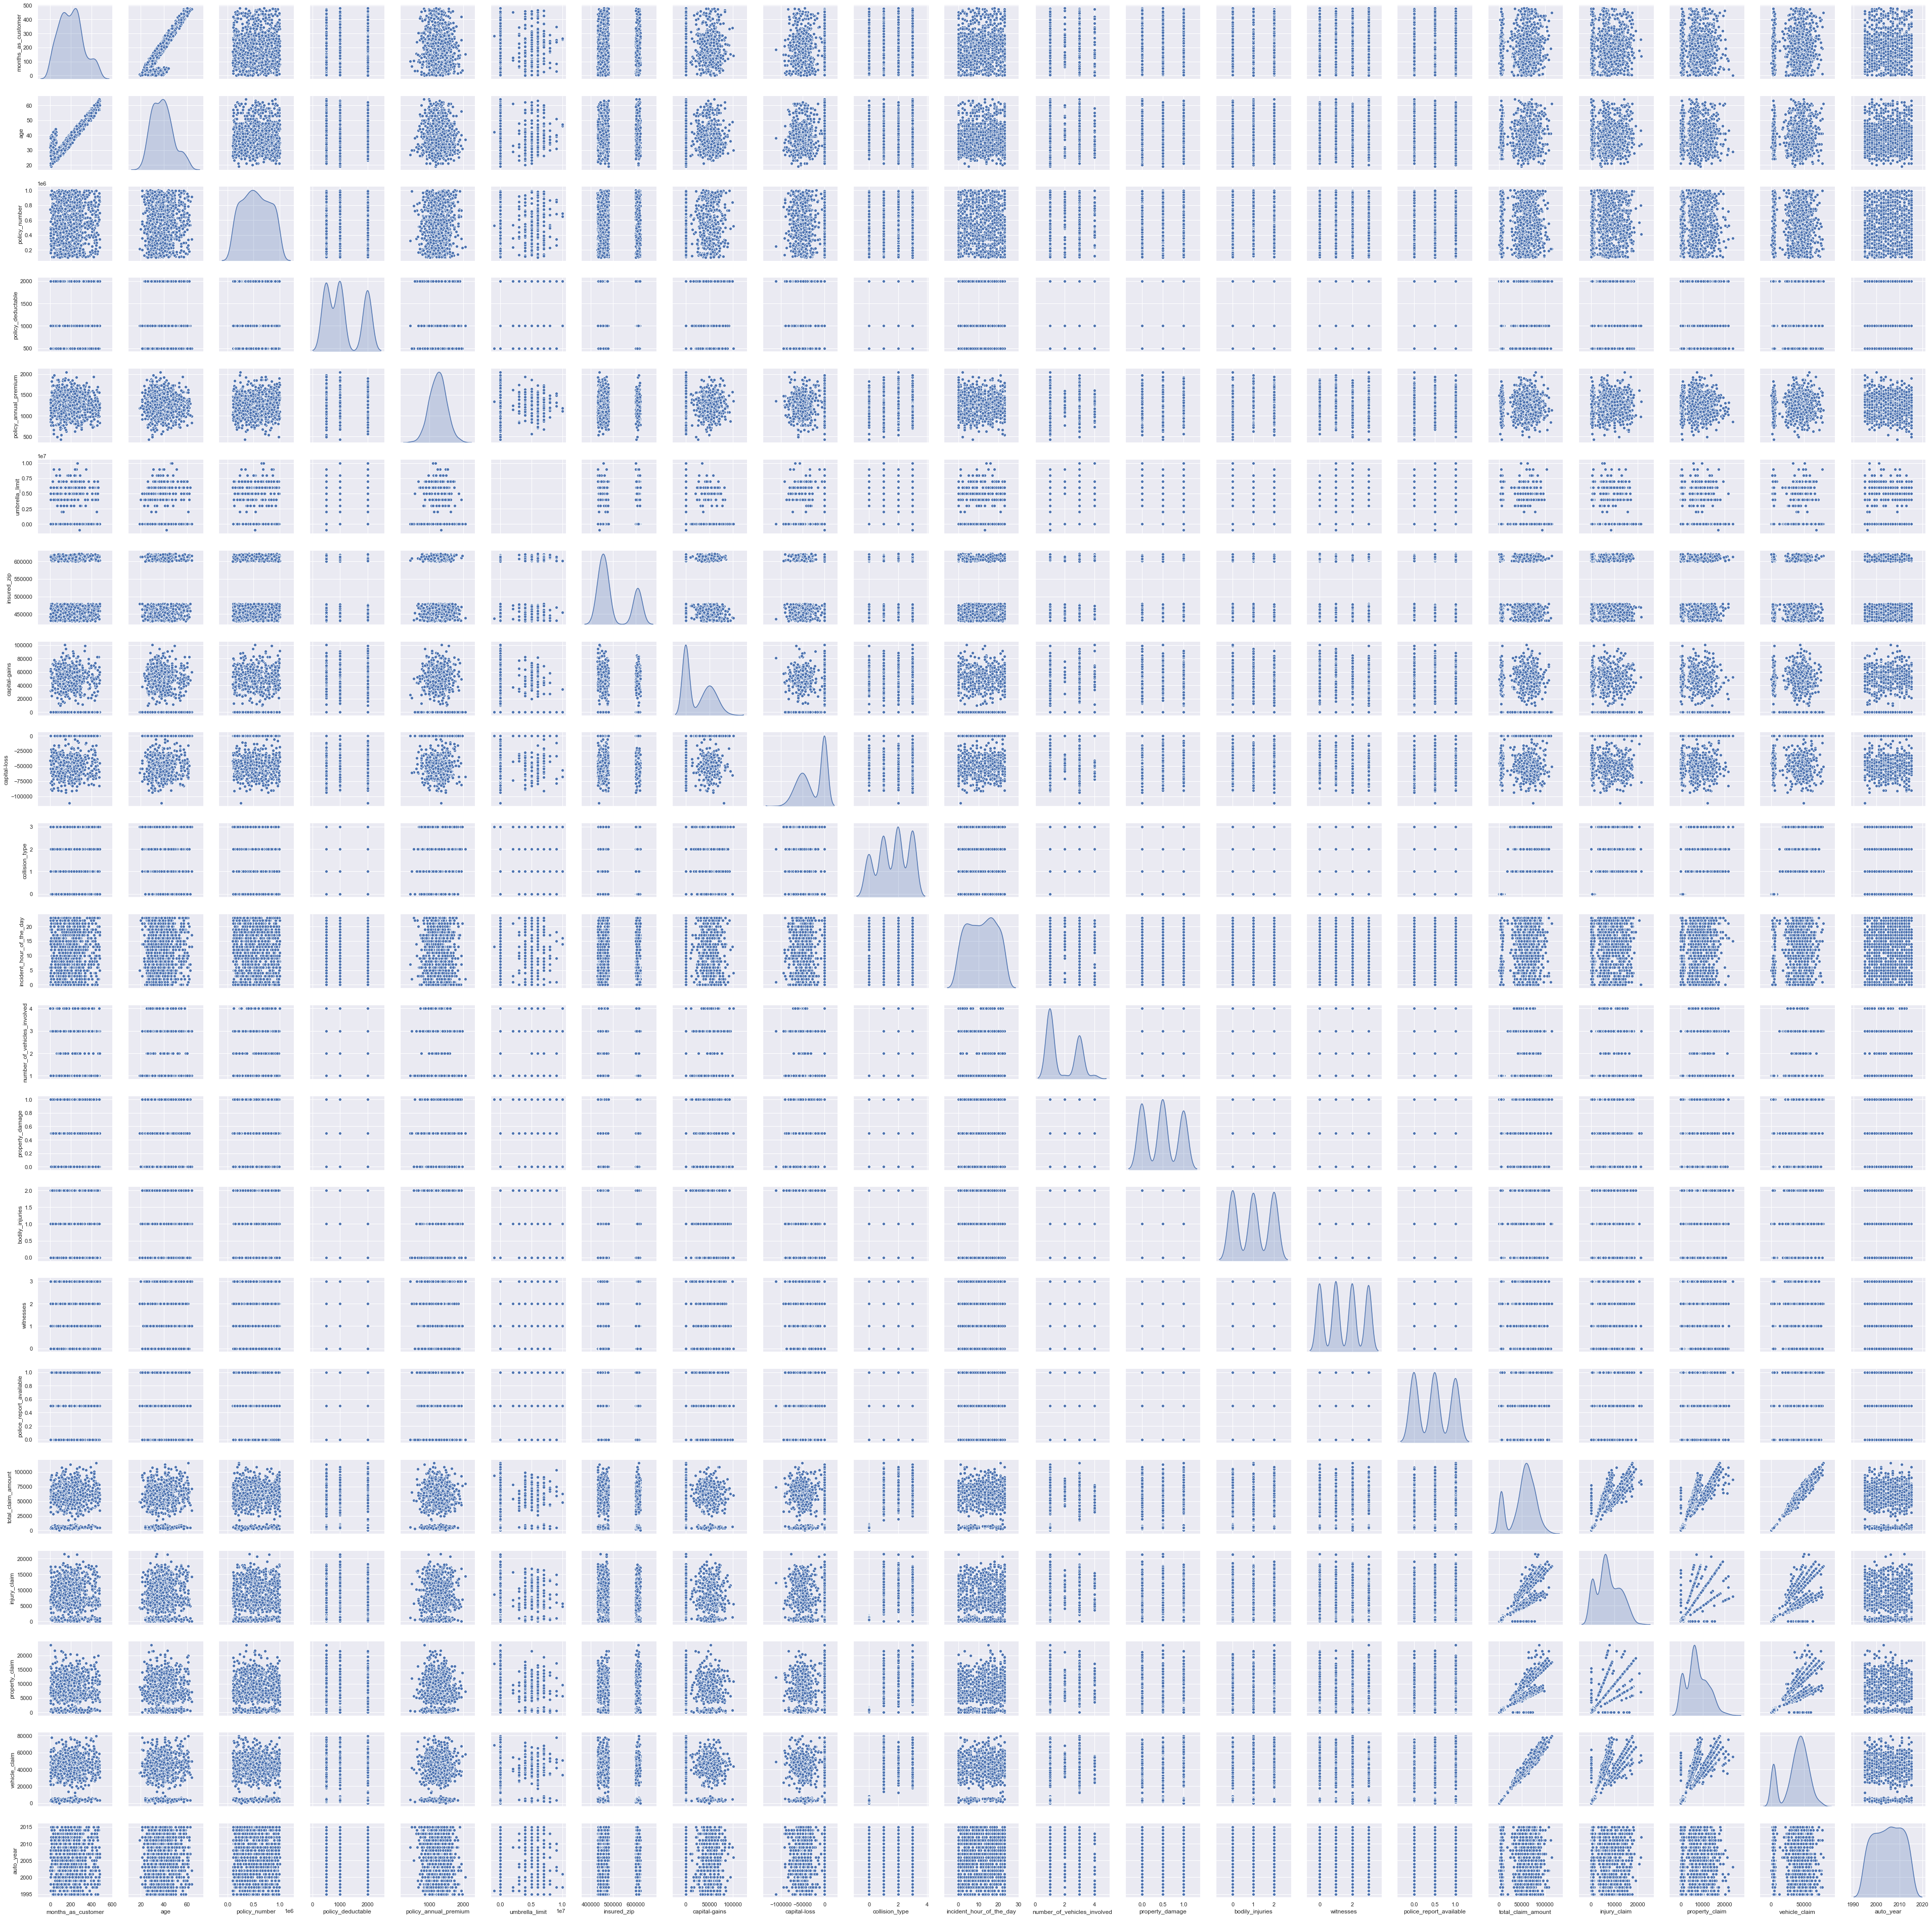

In [12]:
vis5 = sns.pairplot(data, diag_kind= "kde")

In [13]:
le = preprocessing.LabelEncoder()
car = le.fit_transform(list(data["auto_make"]))
y = list(car)
data['auto_model'] = le.fit_transform((data['auto_model']))
x = data[["auto_model"]]

In [14]:
# LOGISTIC REGRESSION
lrbest = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    lr = LogisticRegression(solver="liblinear")
    lrmodel = lr.fit(x_train, y_train)
    lracc = lr.score(x_test, y_test)
    if lracc > lrbest:
        lrbest = lracc
        with open("LoReBeans.pickle", "wb") as f:
            pickle.dump(lrmodel, f)


Lrpickle = open("SVMBeans.pickle", "rb")
lrmodel = pickle.load(Lrpickle)
lracc = lr.score(x_test, y_test)
print("Accuracy using Logistic Regression: ", round(lracc*100, 2), "%")

Accuracy using Logistic Regression:  34.0 %


In [15]:
# K NEAREST NEIGHBORS
knnbest = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    knnmodel = KNeighborsClassifier(n_neighbors=3)
    knnmodel.fit(x_train, y_train)
    knnacc = knnmodel.score(x_test, y_test)
    if knnacc > knnbest:
        knnbest = knnacc
        with open("KNNAccuracy.pickle", "wb") as f:
            pickle.dump(knnmodel, f)


Knnpickle = open("KNNAccuracy.pickle", "rb")
knnmodel = pickle.load(Knnpickle)
knnacc = knnmodel.score(x_test, y_test)
print("Accuracy using KNN: ", round(knnacc*100, 2), "%")

Accuracy using KNN:  100.0 %


In [16]:
# SUPPORT VECTOR MACHINES
svmbest = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    svmmodel = svm.SVC(kernel="linear", C=1)
    svmmodel.fit(x_train, y_train)
    y_pred = svmmodel.predict(x_test)
    svmacc = metrics.accuracy_score(y_test, y_pred)
    if svmacc > svmbest:
        svmbest = svmacc
        with open("SVMBeans.pickle", "wb") as f:
            pickle.dump(svmmodel, f)


Svmpickle = open("SVMBeans.pickle", "rb")
svmmodel = pickle.load(Svmpickle)
svmmodel.fit(x_train, y_train)
y_pred = svmmodel.predict(x_test)
svmacc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy using SVM: ", round(svmacc*100, 2), "%")

Accuracy using SVM:  50.0 %
